# Permanent Income Model

## Overview

__This notebook displays three models and solutions with capital and endogenously determined long-run risk.  The models are considered in each of the three sections of this notebook and include:__

__1. Adjustment cost__

__2. Permanent income__

__3. Habit persistance__

__The first is an AK model with adjustment costs inspired in part by Eberly and Wong but includes a persistence process for technology.  The second is a version of Friedman's permanent income model, and the third one extends this to include habit persistence preferences motivated by the work of Hansen, Sargent Tallarini.__

*This Notebook illustrates the impulse responses and robustness with respect to Friedman's permanent income model in "Robust social planner with a single capital stock: notes" ("notes" for reference). The Notebook has four sections:*

*1. Impulse responses of logarithm of non-financial income and consumption*

*2. Impulse responses of logarithm of consumption*

*3. Present value responses log consumption/income ratio*

*4. Robustness*

## Section 2: Permanent Income

### Section 2.1: Impulse responses of log income

We evaluate first-order approximation for consumption at a logarithm of the non-financial income process {$Y_{t}$} adapted from Hansen et al. (1999). In the paper, there are two components of the logarithm of non-financial income, one more persistent than the other. To construct the first component, let

\begin{equation*}
 X^{1}_{1,t+1} = .704X^{1}_{1,t} + \begin{bmatrix} .144 & 0 \end{bmatrix} W_{t+1}
\end{equation*}

and get $Y^{1}_{1,t+1} = Y^{1}_{t} + X^{1}_{1,t+1}$. For the second component, let

\begin{equation*}
 X^{1}_{2,t+1} = X^{1}_{2,t} - .154 X^{1}_{2,t-1} + \begin{bmatrix} 0 & .206 \end{bmatrix} W_{t+1}
\end{equation*}

and get $Y^{1}_{2,t+1} = X^{1}_{2,t+1}$. Let $Y^{1}_{t+1} = (.01)Y^{1}_{1,t+1} + (.01)Y^{1}_{2,t+1}$. In this case {$Y^{1}_{t}$} process is an additive functional. 

We set the asset return $\rho = .00663$ and the constant in the logarithm of income process $\nu = .00373$. We assume that

$$\exp(-\delta + \rho - \nu) = 1$$

and thus $\delta = \rho - \nu$. Both innovation standard deviations are scaled by $1.33$ to achieve to achieve the target consumption growth rate volatility (log differences multiplied by 100). We plot the impulse responses of log income to the permanent and transitory shock processes. Top panel in <font color='green'>green</font> is the impulse response for the permanent shock. Bottom panel in <font color='blue'>blue</font> is the response for the transitory shock. 

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from permanent_income_code import *

# Parameters
T = 2000        # Time horizon
S = 2           # Impulse date
ρ = 0.00663     # rate of return on assets
ν = 0.00373     # constant in the log income process
σ1 = 0.108*1.33 # Permanent shock
σ2 = 0.155*1.33 # Transitory shock


# Compute income responses
Y1, Y2 = income_path(T=T, S=S, sigma1=σ1, sigma2=σ2)


# Plot income responses
fig, axes = plt.subplots(2, 1,figsize=(8,8))
plt.subplots_adjust(hspace=0.5)
p_args = {'lw': 2, 'alpha': 0.7}

L = 0.6

for ax in axes:
    ax.grid(alpha=0.5)
    ax.set_xlim(0,40)
    ax.set_xlabel(r'Quarters')
    ax.set_ylim(0, L)

    
ax = axes[0]
ax.plot(list(range(T)), Y1[S:], 'g-', **p_args) 

ax = axes[1]
ax.plot(list(range(T)), Y2[S:], 'b-', **p_args)

plt.show()

### Section 2.2: Impulse responses of log consumption

Next, we plot the impulse responses of the log consumption process {$C_{t}+Y_{t}$}. We first express the log consumption-income ratio process {$C_{t}$} in terms of {$X_t$} explicitly. From "notes", we have

\begin{equation}
\tag{1}
\label{1}
 Y^{1}_{t+1} - Y^{1}_{t} = \mathbb{D}_{y} \cdot X_t + \mathbb{F}_{y} \cdot W_{t+1}
\end{equation}

and


\begin{equation}
\tag{2}
\label{2}
X_{t+1} = \mathbb{A}_{x}X_{t} + \mathbb{B}_{x}W_{t+1} 
\end{equation}

The first-order approximation for the financial income {$K^{1}_{t}$} in terms of {$C^{1}_{t}$} is

\begin{equation}
\tag{3}
\label{3}
K^{1}_{t+1} = \exp(\rho - \nu) K^{1}_{t} - \exp(-\nu) C^{1}_{t}
\end{equation}


We can express the approximation to the log consumption-income ratio with the planner's two income sources: financial income and non-financial income,

\begin{equation}
\tag{4}
\label{4}
C^{1}_{t} = \frac{\exp(\nu)(1-\lambda)}{\lambda} K^{1}_{t} + \sum^{\infty}_{j=1} \lambda^{j} E(Y^{1}_{t+j} - Y^{1}_{t+j-1} \vert \mathcal{F}_t)
\end{equation}

where $\lambda = \exp(\nu - \rho)$. Solving the geometric series with equations (\ref{1}) and (\ref{2}), the non-financial income contribution to the log consumption-income ratio can be expressed as

\begin{equation}
\tag{5}
\label{5}
\sum^{\infty}_{j=1} \lambda^{j} E(Y^{1}_{t+j} - Y^{1}_{t+j-1} \vert \mathcal{F}_t) = \lambda \mathbb{D}_{y}^{T} (I - \lambda A_{x})^{-1} X_{t} = MX_{t}
\end{equation}

Plug equations (\ref{5}) and (\ref{3}) into equation (\ref{4}) and re-arrange the terms, we get the explicit expression of {$K^{1}_{t}$} as an additive functional in terms of {$X_{t}$}:

\begin{equation}
\tag{6}
\label{6}
K^{1}_{t+1} - K^{1}_{t} = -\exp(-\nu) M X_{t}
\end{equation}

And from (\ref{4}) and (\ref{6}), we get

\begin{equation}
\tag{7}
\label{7}
C^{1}_{t+1} - C^{1}_{t} = [\exp(\rho) - \exp(\nu)] (K^{1}_{t+1} - K^{1}_{t}) + M(X_{t+1} - X_{t}) = MX_{t+1} - \exp(\rho - \nu) X_{t}
\end{equation}

which expresses the log income-consumption ratio {$C^{1}_{t}$} in terms of {$X^{1}_{t}$}. Adding {$C^{1}_{t}$} to the log non-financial income process {$Y^{1}_{t}$}, we obtain the log consumption process {$C^{1}_{t} + Y^{1}_{t}$}.

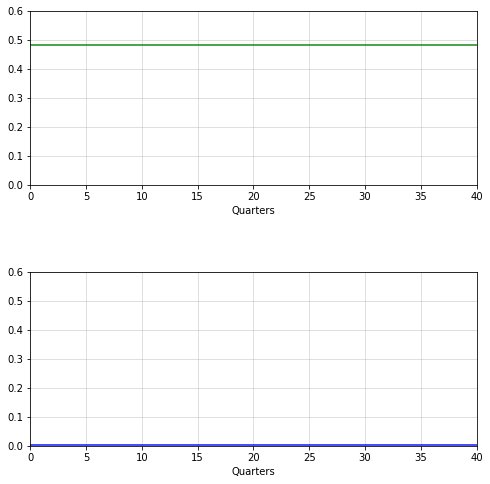

In [2]:
# =============================================================================
# 2.3： Impulse response -- C + Y
# =============================================================================
# Comp
λ = np.exp(ν - ρ)
D = np.array([[0.704],[0],[-0.154]])
A = np.array([[0.704,0,0],[0,1,-0.154],[0,1,0]])
M = λ * np.matmul(D.T, np.linalg.inv(np.identity(A.shape[0]) - λ*A))
M = M.flatten()
T = 2000        # Time horizon
S = 2           # Impulse date
ρ = 0.00663     # rate of return on assets
ν = 0.00373     # constant in the log income process
σ1 = 0.108*1.33 # Permanent shock
σ2 = 0.155*1.33 # Transitory shock

C1, C2 = consumption_income_ratio_path(M, 
                                       T=T, 
                                       S=S, 
                                       rho=ρ, 
                                       nu=ν,
                                       sigma1=σ1, 
                                       sigma2=σ2)
C1Y1 = C1 + Y1
C2Y2 = C2 + Y2


fig, axes = plt.subplots(2, 1,figsize=(8,8))
plt.subplots_adjust(hspace=0.5)
p_args = {'lw': 2, 'alpha': 0.7}

L = 0.6

for ax in axes:
    ax.grid(alpha=0.5)
    ax.set_xlim(0,40)
    ax.set_xlabel(r'Quarters')
    ax.set_ylim(0, L)

ax = axes[0]
ax.plot(list(range(T)), C1Y1[S:], 'g-', **p_args)

ax = axes[1]
ax.plot(list(range(T)), C2Y2[S:], 'b-', **p_args)

plt.show()

The responses of consumption to shocks are both constant across horizons. This is aligned with the first-order approximation to the Euler equation:

\begin{equation}
E[C^{1}_{t+1} + Y^{1}_{t+1} \vert \mathcal{F}_t] = C^{1}_{t} + Y^{1}_{t}
\end{equation}

The two consumption responses for the two shocks are:


In [3]:
# Print the values of the two responses
print('Permanent shock = %.3g' % C1Y1[-1])
print('Transitory shock = %.3g' % C2Y2[-1])

Permanent shock = 0.482
Transitory shock = 0.00383


### Section 2.3: Present value responses of log consumption/income ratio

We plot the discounted cumulative sum for the impulse reponses of log consumption/income ratio {$C^{1}_{t}$}. We discount the impulse response function by $\lambda$, and thus the present value will be

\begin{equation}
\lim_{T \to \infty}\sum^{T}_{t=0} \lambda^{t} C^{1}_{t}
\end{equation}

The plots below shows the present value responses as $T$ approaches infinity. The infinite discounted sum of the response of $C^{1}_{t}$ to both shocks will converge to zero, and yet the convergence is slow.

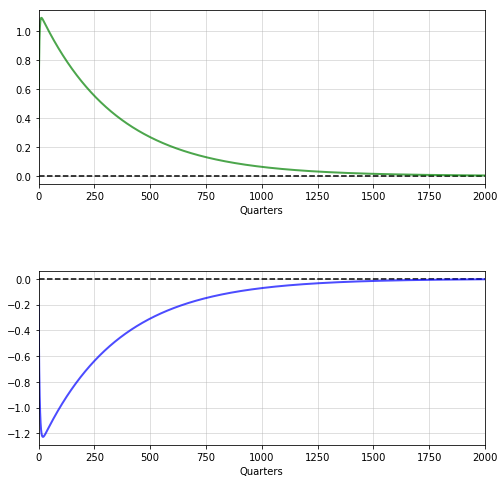

In [4]:
#==============================================================================
# Discounted cumulative sum for impulse response of C
#==============================================================================
n = np.arange(T)
lam = λ**n
cumsum_C1 = np.cumsum(C1[S:]*lam)
cumsum_C2 = np.cumsum(C2[S:]*lam)

fig, axes = plt.subplots(2, 1,figsize=(8,8))
plt.subplots_adjust(hspace=0.5)
p_args = {'lw': 2, 'alpha': 0.7}


for ax in axes:
    ax.grid(alpha=0.5)
    ax.set_xlim(0,T)
    ax.plot((0,T),(0,0), 'k--')
    ax.set_xlabel(r'Quarters')
    
    
ax = axes[0]
ax.plot(list(range(T)), cumsum_C1, 'g-', **p_args)

ax = axes[1]
ax.plot(list(range(T)), cumsum_C2, 'b-', **p_args)  

plt.show()

### Section 2.4: Robustness

We now add the robustness concern to the model by adding risk sensitivity to the utility function. We characterize an obsetvational equivalence between discount rate $\delta$ and robustness concern $\frac{1}{\xi}$, similar to the construction in Hansen et al. (1999). We assume that

\begin{equation}
\delta = \rho - \nu - \frac{|F_{c} + F_{y}|^{2}}{\xi}
\end{equation}

where $\delta$ is affine in $\frac{1}{\xi}$, $F_{c}$ and $F_{y}$ are respectively permanent and transitory shocks of the log consumption responses {$C^{1}_{t}$}. Below we plot the relation between subjective discount rates $\delta$ and robustness $\frac{1}{\xi}$. The value of $\frac{1}{\xi}$ when $\delta$ reaches zero is $124.80$.

The maximum value of 1/xi: 124.80


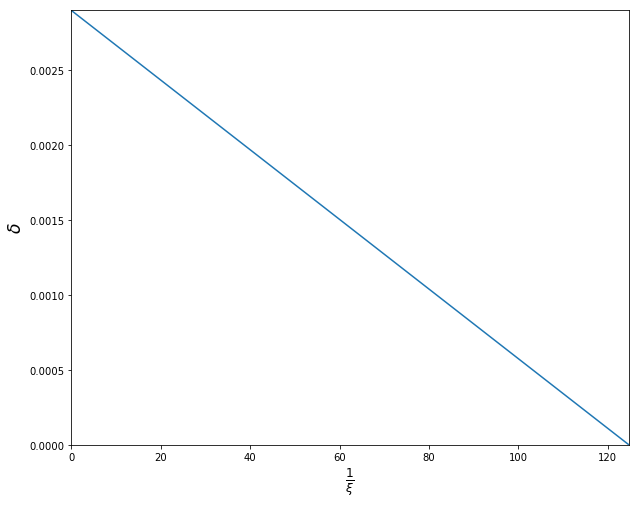

In [5]:
#==============================================================================
# Observational Equivalence
#==============================================================================
# The squared value of Fc + Fy
FcFy_sq = (C1Y1[-1]*0.01)**2 + (C2Y2[-1]*0.01)**2

# The grid values of 1/ξ
s = np.arange(0,1000,0.1)

# Subjective discount rate
δ = ρ - ν - FcFy_sq*s

# The value of 1/ξ where δ is 0
max_s = s[np.where(δ > 0)[0][-1]]
print(r'The maximum value of 1/xi: %.2f' % max_s)


# Plot
fig, ax = plt.subplots(figsize=(10,8))
plt.subplots_adjust(hspace=0.5)
p_args = {'lw': 2, 'alpha': 0.7}
ax.set_xlim(0,max_s)
ax.set_ylim(0,δ[0])
ax.set_xlabel(r'$\frac{1}{\xi}$', size='xx-large')
ax.set_ylabel(r'$\delta$', size='xx-large')

ax.plot(s, δ)

plt.show()

## References

Hansen, Lars Peter, Thomas Sargent, and Thomas Tallarini. 1999. Robust Permanent
Income and Pricing. *Review of Economic Studies* 66 (4):873-907.